In [1]:
import numpy as np 
import pandas as pd 

import random
import itertools
from importlib import reload
from datetime import datetime

import matplotlib.pyplot as plt

from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV

from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

from sklearn import metrics
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

# my packages
import tools as t

# DATASET  

The dataset is the MIT-BIH Arrhythmia Dataset:  
https://www.kaggle.com/gregoiredc/arrhythmia-on-ecg-classification-using-cnn  
https://archive.physionet.org/physiobank/database/html/mitdbdir/intro.htm

- Number of Samples: 109446
- Number of Categories: 5
- Sampling Frequency: 125Hz
- Data Source: Physionet's MIT-BIH Arrhythmia Dataset
- Classes: ['N': 0, 'S': 1, 'V': 2, 'F': 3, 'Q': 4]  
(N - Normal beat, S - Supraventricular premature beat, V - Premature ventricular contraction, F - Fusion of ventricular and normal beat, Q - Unclassifiable beat)

Each row is one beat taken from the original source (represents 10 seconds of data)

__Task:__ multiclass classification

In [2]:
import os
for dirname, _, filenames in os.walk('/data'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

        
# mitbih data
df_train = pd.read_csv('data/mitbih_train.csv', header=None)
df_test = pd.read_csv('data/mitbih_test.csv', header=None)

# combined df
train = df_train.rename(columns={187:'y'})
test = df_test.rename(columns={187:'y'})

# training data
X_train = train[train.columns[:-1]]
y_train = train[train.columns[-1]]

# testing data
X_test = test[test.columns[:-1]]
y_test = test[test.columns[-1]]

# EXPLORATORY DATA ANALYSIS

- The observations are skewed.
- Normal heartbeat is the most popular class. Deviations from this class are scarce, especially for class 1 (S - Supraventricular premature beat) and 3 (F - Fusion of ventricular and normal beat) and require more attention.

In [3]:
from tools.preprocessing import eda

In [4]:
cls_df = eda.Dataset(X_train)
# cls_df.get_overview()

NaNs:  []
Unique formats:  [dtype('float64')]
Possible categorical variables (<10 unique values):  []
Min value < 0:  []
Observations per class:
 0    72471
1     2223
2     5788
3      641
4     6431
Name: y, dtype: int64
Plotting distributions of variables against normal distribution


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdep

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdep

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdep

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdep

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdep

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdep

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdep

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdep

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdep

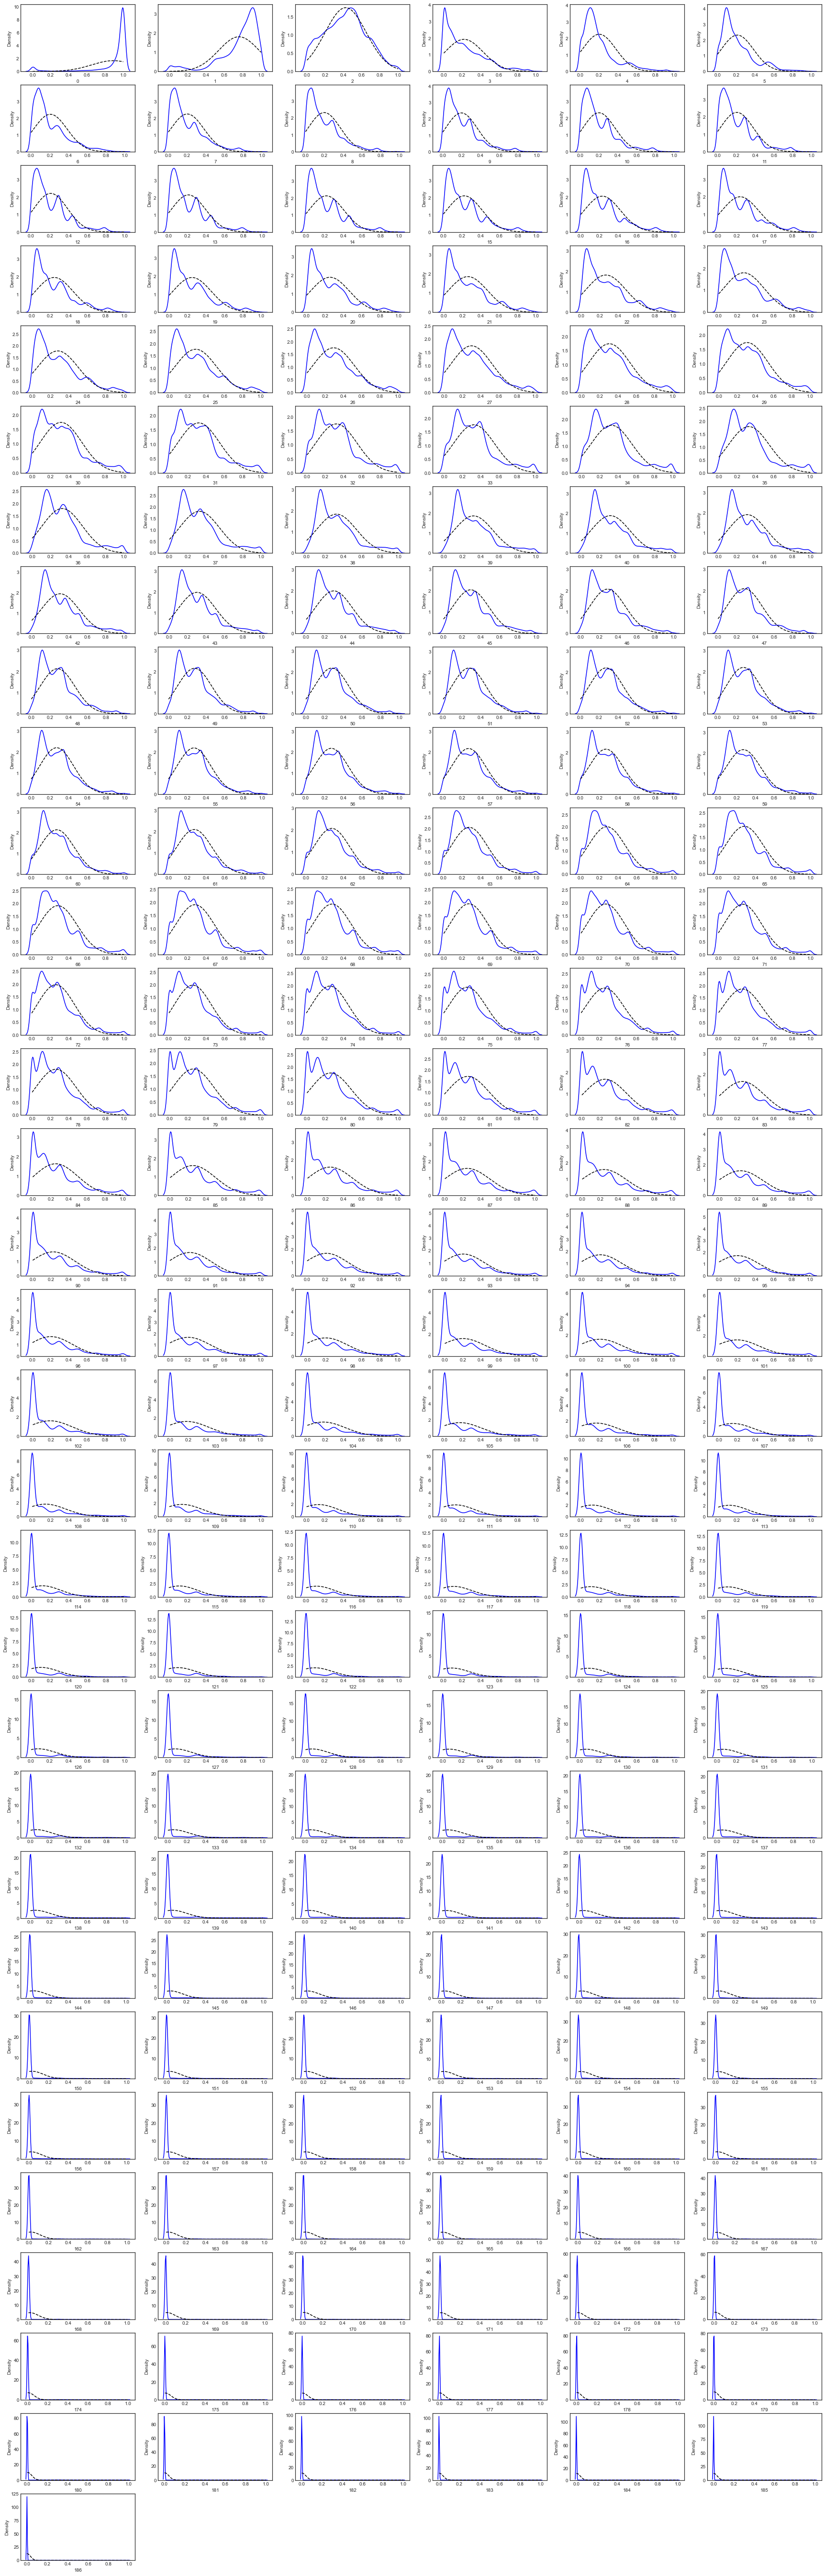

In [5]:
reload(eda)
cls_df = eda.Dataset(X_train)
cls_df.get_summary(y=y_train,
    nan=True,
    formats=True,
    categorical=True,
    min_less_0=True,
    class_counts=True,
    check_normdist=True,
    plot_boxplots=False)

### Observations per class

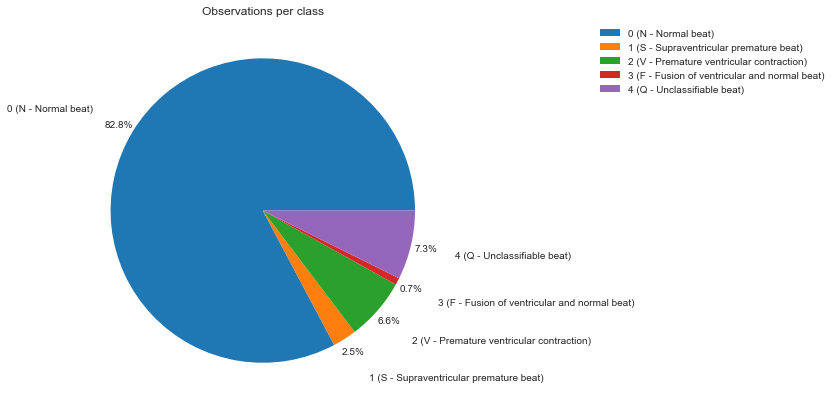

In [10]:
labels = ['0 (N - Normal beat)',
          '1 (S - Supraventricular premature beat)',
          '2 (V - Premature ventricular contraction)',
          '3 (F - Fusion of ventricular and normal beat)',
          '4 (Q - Unclassifiable beat)']
 
plt.figure(figsize=(10, 7))
plt.pie(y_train.astype(int).value_counts().sort_index(), labels=labels, autopct='%1.1f%%', pctdistance=1.1, labeldistance=1.3)
plt.title('Observations per class')
plt.legend( bbox_to_anchor=(2, 1), loc='upper right')
plt.show()

### Examples from different classes

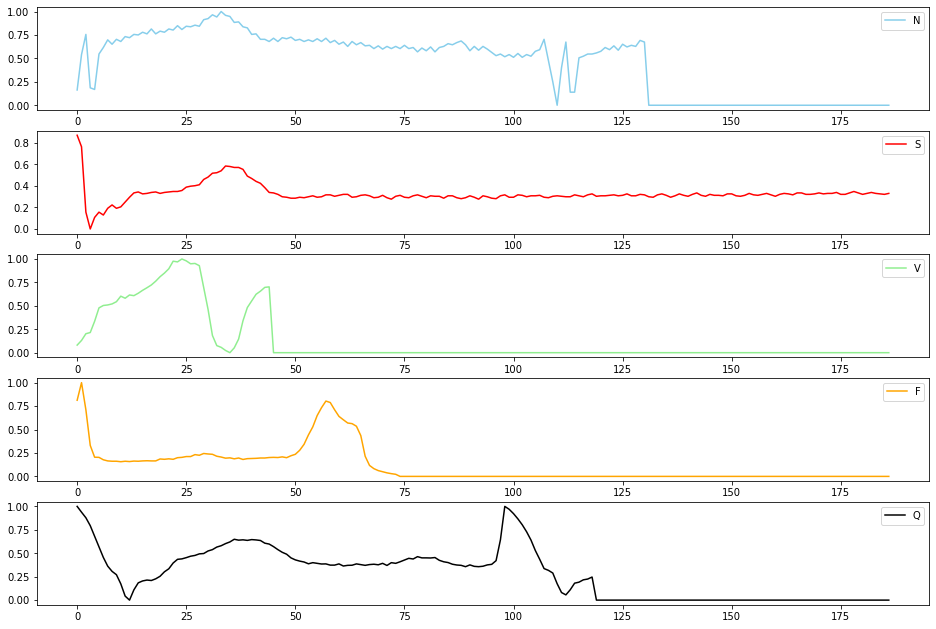

In [8]:
# sample one observation
r_sample = df_train.groupby(187, group_keys=False).apply(lambda train_df: train_df.sample(1, random_state=42))

# plot 
fig, axes = plt.subplots(5, 1, figsize=(16, 11))
leg = iter(['N - Normal beat',
 'S - Supraventricular premature beat',
 'V - Premature ventricular contraction',
 'F - Fusion of ventricular and normal beat',
 'Q - Unclassifiable beat'])
colors = iter(['skyblue', 'red', 'lightgreen', 'orange', 'black'])
for i, ax in enumerate(axes.flatten()):
    ax.plot(r_sample.iloc[i, :187], color=next(colors))
#     print(next(leg))
    ax.legend(next(leg))
plt.show()


# MODEL SELECTION  

__The problem__:  
Although the accuracy is pretty high (90%), recall is very low for some classes (1 (S - Supraventricular premature beat) and 3 (F - Fusion of ventricular and normal beat)). Since the dataset is unbalanced (normal beat represents the majority of the datapoints), accuracy is not a good measure for assessing model performance, because we should focus on positive cases for these classes if we wish to identify the disease. 

So, we need to improve __recall__, the ability of a model to find all relevant cases within a dataset, while keeping the precision at an appropriate level.



## Individual machine learning models

- Original dataset was used (no feature selection, no sampling).
- Models which were compared: Naive Bayes, Logistic regression, SVM, kNN, Decision trees.
- Best performing models based on recall: SVM, kNN, DT.

In [12]:
#train validation split
X_train, X_val, y_train, y_val = train_test_split(train.iloc[:,:-1], train.iloc[:,-1], 
                                                    test_size=0.2, random_state=42)

import multiprocessing
n_jobs=multiprocessing.cpu_count()  # 56

#my package
import tools as t
reload(t)
from tools.models import classification as c

# Create the pipeline
from sklearn.preprocessing import StandardScaler
steps = [
#     ('scaler', StandardScaler()),
#     ('scaler', RobustScaler()),
#     ('pca', PCA(n_components=)),
]

cls_models = c.SimpleML(X_train, y_train, X_val, y_val)


2021-06-06 18:16:42

========== NB RESULT ==========
Mean cross-validated score of the best_estimator: 0.1719
Tuned parameters: {}
F1-score: 0.1849
Precision: 0.7952
Recall: 0.1781
Accuracy on train data: 0.1795
Accuracy on test data: 0.1781


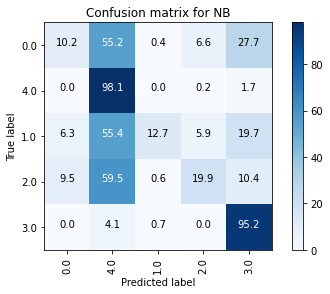

[('NB', GaussianNB())]
[]

========== LR RESULT ==========
Mean cross-validated score of the best_estimator: 0.9126
Tuned parameters: {'LR__class_weight': None, 'LR__multi_class': 'multinomial'}
F1-score: 0.9027
Precision: 0.9044
Recall: 0.9152
Accuracy on train data: 0.9145
Accuracy on test data: 0.9152


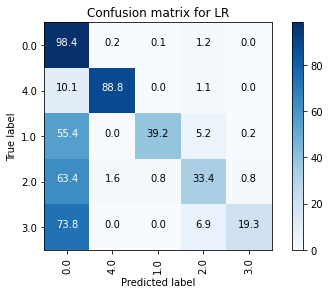

[('LR', LogisticRegression(max_iter=10000))]
[]

========== SVM RESULT ==========
Mean cross-validated score of the best_estimator: 0.9803
Tuned parameters: {'SVM__C': 50, 'SVM__gamma': 0.1, 'SVM__kernel': 'rbf'}
F1-score: 0.9795
Precision: 0.9797
Recall: 0.9802
Accuracy on train data: 0.9917
Accuracy on test data: 0.9802


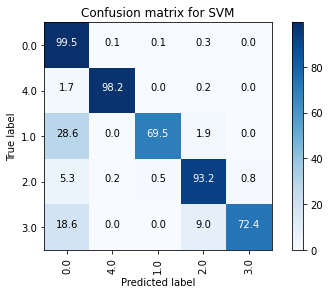

[('SVM', SVC())]
[]

========== KNN RESULT ==========
Mean cross-validated score of the best_estimator: 0.9773
Tuned parameters: {'KNN__n_neighbors': 4, 'KNN__p': 1, 'KNN__weights': 'distance'}
F1-score: 0.9762
Precision: 0.9762
Recall: 0.9769
Accuracy on train data: 1.0
Accuracy on test data: 0.9769


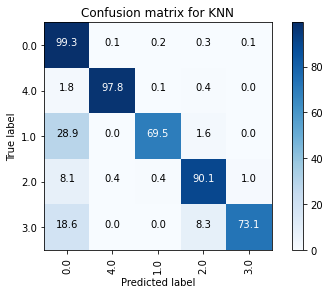

[('KNN', KNeighborsClassifier())]
[]

========== DT RESULT ==========
Mean cross-validated score of the best_estimator: 0.9542
Tuned parameters: {'DT__class_weight': None, 'DT__criterion': 'entropy', 'DT__max_depth': 14, 'DT__max_features': 'sqrt', 'DT__random_state': 42}
F1-score: 0.9545
Precision: 0.9538
Recall: 0.9559
Accuracy on train data: 0.9859
Accuracy on test data: 0.9559


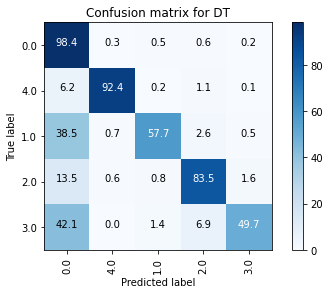

[('DT', DecisionTreeClassifier())]
[]
__________________________________________________
Best model: SVM
Tuned parameters: {'SVM__C': 50, 'SVM__gamma': 0.1, 'SVM__kernel': 'rbf'}
BEST recall: 0.9802
     accuracy  precision  recall      f1
SVM    0.9802     0.9797  0.9802  0.9795
KNN    0.9769     0.9762  0.9769  0.9762
DT     0.9559     0.9538  0.9559  0.9545
LR     0.9152     0.9044  0.9152  0.9027
NB     0.1781     0.7952  0.1781  0.1849
2021-06-06 18:53:13


In [24]:
best_model, allmodels = cls_models.classification_models(multiclass=True,
                                                             steps=steps,
                                                                     metric='recall',
                                                                     average='weighted',
                                                                     randomized_search=False, 
                                                                     nfolds=5,
                                                                     verbose=0,
                                                                     n_jobs=n_jobs)

#### Conclusions:

1. ___Recall equals accuracy:___
    - indicates that sensitivity (TPR) is equal to specificity (TNR), and thus they are also equal to accuracy. This means that the model's ability to correctly classify positive samples is same as its ability to correctly classify negative samples.


1. ___Model performance:___
    - SVM shows the best results among all tested models. However, confusion matrix shows that even it has problems with classifying labels 1 (S - Supraventricular premature beat) and 3 (F - Fusion of ventricular and normal beat).


## Ensembles and boosting

### XGBoost

In [ ]:
%%time

import xgboost as xgb

name = 'XGB'
model = xgb.XGBClassifier(    
    seed=42,
    verbosity=0,
    use_label_encoder=False,
    objective='multi:softmax',
    num_class=5,
#     eval_metric='mlogloss',
    eval_metric='merror',
)

steps=[]

parameters = {    
    'XGB__eta': [0.05, 0.3, 0.5],  # 0.3
    'XGB__gamma': [0, 1, 5],  # 0
    'XGB__max_depth': [3, 6, 10],  # 6
    'XGB__min_child_weight': [0.5, 1],  # 1
    'XGB__subsample': [0.7, 1],  # 1
    'XGB__sampling_method': ['uniform', 'gradient_based'],  # uniform
#     'XGB__colsample_bytree': [0.7],  # 1
    'XGB__lambda': [1],  # 1
    'XGB__alpha': [0],  # 0
    'XGB__tree_method': ['auto'],  # auto
    'XGB__scale_pos_weight': [0.3, 0.7, 1],  # 1
    'XGB__predictor': ['cpu_predictor'],  # auto
    'XGB__num_parallel_tree': [1],  # 1

#     n_jobs = n_jobs
}
# https://xgboost.readthedocs.io/en/latest/parameter.html#general-parameters

model_xgb = cls_models.checkmodel(
                                    name,
                                    model,
                                    steps=steps,
                                    parameters=parameters,
                                    average='weighted',
                                    multiclass=True,
                                    metric='recall',
                                    randomized_search=False,
                                    nfolds=5,
                                    n_jobs=56,
                                    verbose=1
                                    )

# Wall time: 4min 16s
# Wall time: 3min 5s
# 

Fitting 5 folds for each of 648 candidates, totalling 3240 fits


[Parallel(n_jobs=56)]: Using backend LokyBackend with 56 concurrent workers.
[Parallel(n_jobs=56)]: Done  88 tasks      | elapsed: 18.2min
[Parallel(n_jobs=56)]: Done 338 tasks      | elapsed: 102.6min
[Parallel(n_jobs=56)]: Done 688 tasks      | elapsed: 204.1min


### Gradient boosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

name='GradientBoosting'
model = GradientBoostingClassifier(random_state=42)

steps=[]

parameters = {}

model_gb = cls_models.checkmodel(
                                    name,
                                    model,
                                    steps=steps,
                                    parameters=parameters,
                                    average='weighted',
                                    multiclass=True,
                                    metric='recall',
                                    randomized_search=False,
                                    nfolds=5,
                                    n_jobs=45,
                                    verbose=1
                                    )


### LightGBM

In [ ]:
import lightgbm as lgb

name='LGBMClassifier
lgbm = lgb.LGBMClassifier(seed=42)

steps=[]

parameters = {}

model_lgbm = cls_models.checkmodel(
                                    name,
                                    model,
                                    steps=steps,
                                    parameters=parameters,
                                    average='weighted',
                                    multiclass=True,
                                    metric='recall',
                                    randomized_search=False,
                                    nfolds=5,
                                    n_jobs=45,
                                    verbose=1
                                    )

### AdaBoost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier

name='AdaBoost'
model = AdaBoostClassifier(random_state=42)

steps=[]

parameters = {}

model_ada = cls_models.checkmodel(
                                    name,
                                    model,
                                    steps=steps,
                                    parameters=parameters,
                                    average='weighted',
                                    multiclass=True,
                                    metric='recall',
                                    randomized_search=False,
                                    nfolds=5,
                                    n_jobs=45,
                                    verbose=1
                                    )

### Random forests

In [13]:
from sklearn.ensemble import RandomForestClassifier

name='RandomForest'
model = RandomForestClassifier(random_state=42)

steps=[]

parameters = {
    
}

model_ada = cls_models.checkmodel(
                                    name,
                                    model,
                                    steps=steps,
                                    parameters=parameters,
                                    average='weighted',
                                    multiclass=True,
                                    metric='recall',
                                    randomized_search=False,
                                    nfolds=5,
                                    n_jobs=45,
                                    verbose=1
                                    )

AssertionError: Parameter 'name' must be specified without space insde.

# TODO

- Fine tuning
- Compare models constructed on balanced / unbalanced dataset using different down-sampling/upsampling techniques.
- Try ensembles (random forests) and boosting.

